# Sepsis positive matrix

## Exploration of a single ICU sepsis data log

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = '../training/'

In [3]:
# Choose patient sample
sample_num = 200

In [4]:
# Import and print dataframe layout
def loadICUdata(sample_num, path = './', printdf = False):
    samplestr = 'p' + (str(sample_num) + '.psv').rjust(9, '0')
    fname = path + samplestr
    df = pd.read_csv(fname, sep = '|')
    print(fname, ' file:')
    if printdf:
        print(df)
    return df

In [5]:
df = loadICUdata(sample_num, path, True)

../training/p00200.psv  file:
       HR  O2Sat   Temp    SBP    MAP   DBP  Resp  EtCO2  BaseExcess  HCO3  \
0     NaN    NaN    NaN    NaN    NaN   NaN   NaN    NaN         NaN   NaN   
1    65.0  100.0  34.90  201.0  109.0  65.5  16.0    NaN         NaN   NaN   
2    79.5  100.0  36.05  211.5  102.5  63.5  16.0    NaN         NaN   NaN   
3    84.0   99.0  37.10  183.0   95.0  61.0  19.0    NaN         NaN   NaN   
4    90.0   99.0  37.40  136.5   75.0  55.5  23.0    NaN         NaN   NaN   
5    86.5   98.0  37.90  175.5   96.0  65.0  22.5    NaN         NaN   NaN   
6    84.0    NaN  38.30  130.0   74.0  53.0  24.0    NaN         NaN   NaN   
7    80.0  100.0  38.40  171.0   93.0  62.0  22.0    NaN         NaN   NaN   
8    79.0  100.0  38.20  182.0   99.0  64.0  25.0    NaN         NaN   NaN   
9    81.0   97.0  38.60  197.0  101.0  68.0  26.0    NaN         NaN   NaN   
10   77.0   87.5  38.50  194.0  102.0  65.0  27.0    NaN         NaN   NaN   
11   70.5   91.0  38.25  247.5  12

In [6]:
df

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,57,0,0,1,-6.58,1,0
1,65.0,100.0,34.90,201.0,109.0,65.5,16.0,NaN,NaN,NaN,...,11.0,187.0,149.0,57,0,0,1,-6.58,2,0
2,79.5,100.0,36.05,211.5,102.5,63.5,16.0,NaN,NaN,NaN,...,NaN,NaN,NaN,57,0,0,1,-6.58,3,0
3,84.0,99.0,37.10,183.0,95.0,61.0,19.0,NaN,NaN,NaN,...,NaN,NaN,NaN,57,0,0,1,-6.58,4,0
4,90.0,99.0,37.40,136.5,75.0,55.5,23.0,NaN,NaN,NaN,...,NaN,NaN,NaN,57,0,0,1,-6.58,5,0
5,86.5,98.0,37.90,175.5,96.0,65.0,22.5,NaN,NaN,NaN,...,NaN,NaN,NaN,57,0,0,1,-6.58,6,0
6,84.0,NaN,38.30,130.0,74.0,53.0,24.0,NaN,NaN,NaN,...,NaN,NaN,NaN,57,0,0,1,-6.58,7,0
7,80.0,100.0,38.40,171.0,93.0,62.0,22.0,NaN,NaN,NaN,...,NaN,NaN,NaN,57,0,0,1,-6.58,8,0
8,79.0,100.0,38.20,182.0,99.0,64.0,25.0,NaN,NaN,NaN,...,8.2,NaN,105.0,57,0,0,1,-6.58,9,0
9,81.0,97.0,38.60,197.0,101.0,68.0,26.0,NaN,NaN,NaN,...,NaN,NaN,NaN,57,0,0,1,-6.58,10,0


## Check sepsis labels for ALL patients

In [7]:
# get the sepsis label value
def get_sepsislabel(df):
    sl = df[["SepsisLabel"]]
    count = df['SepsisLabel'].value_counts()
    count_healthy = -1
    count_sep = -1
    
    if len(count) == 2:
        count_sep = count[1]
        count_healthy = count[0]
        
    elif len(count) == 1:
        if sl.values[0] == 0:
            count_healthy = count.values[0]
        elif sl.values[0] == 1:
            count_sep = count.values[0]
    return sl, count_healthy, count_sep


In [8]:
count = df['SepsisLabel'].value_counts()
count.values
len(count)
sl, ch, cs = get_sepsislabel(df)
len(sl)

14

In [9]:
# Print result
sl, ch, cs = get_sepsislabel(df) 
print('patient {:d}, {:d} {:d} {:2.2f}%'.format(sample_num, ch, cs, 100*cs/len(sl)))

patient 200, 14 -1 -7.14%


## Loop study

In [10]:
# Run in a loop and get a sepsis presence report
SL = []    #Sepsis labels
CH = []    #Healthy hours count
CS = []    #Sepsis hours count
CSCH = []  #Percentage cs/(cs+ch)
for i in range(1,5001):
    df = loadICUdata(i, path, False)
    sl, ch, cs = get_sepsislabel(df) 
    SL.append(sl)
    CH.append(ch)
    CS.append(cs)
    if cs != -1 and ch != -1:
        csch = 1.0*cs/(cs + ch)
    elif cs == -1:
        csch = 0
    elif ch == -1:
        csch = 1
    CSCH.append(csch)
    
CSCH = np.array(CSCH)

../training/p00001.psv  file:
../training/p00002.psv  file:
../training/p00003.psv  file:
../training/p00004.psv  file:
../training/p00005.psv  file:
../training/p00006.psv  file:
../training/p00007.psv  file:
../training/p00008.psv  file:
../training/p00009.psv  file:
../training/p00010.psv  file:
../training/p00011.psv  file:
../training/p00012.psv  file:
../training/p00013.psv  file:
../training/p00014.psv  file:
../training/p00015.psv  file:
../training/p00016.psv  file:
../training/p00017.psv  file:
../training/p00018.psv  file:
../training/p00019.psv  file:
../training/p00020.psv  file:
../training/p00021.psv  file:
../training/p00022.psv  file:
../training/p00023.psv  file:
../training/p00024.psv  file:
../training/p00025.psv  file:
../training/p00026.psv  file:
../training/p00027.psv  file:
../training/p00028.psv  file:
../training/p00029.psv  file:
../training/p00030.psv  file:
../training/p00031.psv  file:
../training/p00032.psv  file:
../training/p00033.psv  file:
../trainin

../training/p00287.psv  file:
../training/p00288.psv  file:
../training/p00289.psv  file:
../training/p00290.psv  file:
../training/p00291.psv  file:
../training/p00292.psv  file:
../training/p00293.psv  file:
../training/p00294.psv  file:
../training/p00295.psv  file:
../training/p00296.psv  file:
../training/p00297.psv  file:
../training/p00298.psv  file:
../training/p00299.psv  file:
../training/p00300.psv  file:
../training/p00301.psv  file:
../training/p00302.psv  file:
../training/p00303.psv  file:
../training/p00304.psv  file:
../training/p00305.psv  file:
../training/p00306.psv  file:
../training/p00307.psv  file:
../training/p00308.psv  file:
../training/p00309.psv  file:
../training/p00310.psv  file:
../training/p00311.psv  file:
../training/p00312.psv  file:
../training/p00313.psv  file:
../training/p00314.psv  file:
../training/p00315.psv  file:
../training/p00316.psv  file:
../training/p00317.psv  file:
../training/p00318.psv  file:
../training/p00319.psv  file:
../trainin

../training/p00576.psv  file:
../training/p00577.psv  file:
../training/p00578.psv  file:
../training/p00579.psv  file:
../training/p00580.psv  file:
../training/p00581.psv  file:
../training/p00582.psv  file:
../training/p00583.psv  file:
../training/p00584.psv  file:
../training/p00585.psv  file:
../training/p00586.psv  file:
../training/p00587.psv  file:
../training/p00588.psv  file:
../training/p00589.psv  file:
../training/p00590.psv  file:
../training/p00591.psv  file:
../training/p00592.psv  file:
../training/p00593.psv  file:
../training/p00594.psv  file:
../training/p00595.psv  file:
../training/p00596.psv  file:
../training/p00597.psv  file:
../training/p00598.psv  file:
../training/p00599.psv  file:
../training/p00600.psv  file:
../training/p00601.psv  file:
../training/p00602.psv  file:
../training/p00603.psv  file:
../training/p00604.psv  file:
../training/p00605.psv  file:
../training/p00606.psv  file:
../training/p00607.psv  file:
../training/p00608.psv  file:
../trainin

../training/p00884.psv  file:
../training/p00885.psv  file:
../training/p00886.psv  file:
../training/p00887.psv  file:
../training/p00888.psv  file:
../training/p00889.psv  file:
../training/p00890.psv  file:
../training/p00891.psv  file:
../training/p00892.psv  file:
../training/p00893.psv  file:
../training/p00894.psv  file:
../training/p00895.psv  file:
../training/p00896.psv  file:
../training/p00897.psv  file:
../training/p00898.psv  file:
../training/p00899.psv  file:
../training/p00900.psv  file:
../training/p00901.psv  file:
../training/p00902.psv  file:
../training/p00903.psv  file:
../training/p00904.psv  file:
../training/p00905.psv  file:
../training/p00906.psv  file:
../training/p00907.psv  file:
../training/p00908.psv  file:
../training/p00909.psv  file:
../training/p00910.psv  file:
../training/p00911.psv  file:
../training/p00912.psv  file:
../training/p00913.psv  file:
../training/p00914.psv  file:
../training/p00915.psv  file:
../training/p00916.psv  file:
../trainin

../training/p01192.psv  file:
../training/p01193.psv  file:
../training/p01194.psv  file:
../training/p01195.psv  file:
../training/p01196.psv  file:
../training/p01197.psv  file:
../training/p01198.psv  file:
../training/p01199.psv  file:
../training/p01200.psv  file:
../training/p01201.psv  file:
../training/p01202.psv  file:
../training/p01203.psv  file:
../training/p01204.psv  file:
../training/p01205.psv  file:
../training/p01206.psv  file:
../training/p01207.psv  file:
../training/p01208.psv  file:
../training/p01209.psv  file:
../training/p01210.psv  file:
../training/p01211.psv  file:
../training/p01212.psv  file:
../training/p01213.psv  file:
../training/p01214.psv  file:
../training/p01215.psv  file:
../training/p01216.psv  file:
../training/p01217.psv  file:
../training/p01218.psv  file:
../training/p01219.psv  file:
../training/p01220.psv  file:
../training/p01221.psv  file:
../training/p01222.psv  file:
../training/p01223.psv  file:
../training/p01224.psv  file:
../trainin

../training/p01516.psv  file:
../training/p01517.psv  file:
../training/p01518.psv  file:
../training/p01519.psv  file:
../training/p01520.psv  file:
../training/p01521.psv  file:
../training/p01522.psv  file:
../training/p01523.psv  file:
../training/p01524.psv  file:
../training/p01525.psv  file:
../training/p01526.psv  file:
../training/p01527.psv  file:
../training/p01528.psv  file:
../training/p01529.psv  file:
../training/p01530.psv  file:
../training/p01531.psv  file:
../training/p01532.psv  file:
../training/p01533.psv  file:
../training/p01534.psv  file:
../training/p01535.psv  file:
../training/p01536.psv  file:
../training/p01537.psv  file:
../training/p01538.psv  file:
../training/p01539.psv  file:
../training/p01540.psv  file:
../training/p01541.psv  file:
../training/p01542.psv  file:
../training/p01543.psv  file:
../training/p01544.psv  file:
../training/p01545.psv  file:
../training/p01546.psv  file:
../training/p01547.psv  file:
../training/p01548.psv  file:
../trainin

../training/p01830.psv  file:
../training/p01831.psv  file:
../training/p01832.psv  file:
../training/p01833.psv  file:
../training/p01834.psv  file:
../training/p01835.psv  file:
../training/p01836.psv  file:
../training/p01837.psv  file:
../training/p01838.psv  file:
../training/p01839.psv  file:
../training/p01840.psv  file:
../training/p01841.psv  file:
../training/p01842.psv  file:
../training/p01843.psv  file:
../training/p01844.psv  file:
../training/p01845.psv  file:
../training/p01846.psv  file:
../training/p01847.psv  file:
../training/p01848.psv  file:
../training/p01849.psv  file:
../training/p01850.psv  file:
../training/p01851.psv  file:
../training/p01852.psv  file:
../training/p01853.psv  file:
../training/p01854.psv  file:
../training/p01855.psv  file:
../training/p01856.psv  file:
../training/p01857.psv  file:
../training/p01858.psv  file:
../training/p01859.psv  file:
../training/p01860.psv  file:
../training/p01861.psv  file:
../training/p01862.psv  file:
../trainin

../training/p02142.psv  file:
../training/p02143.psv  file:
../training/p02144.psv  file:
../training/p02145.psv  file:
../training/p02146.psv  file:
../training/p02147.psv  file:
../training/p02148.psv  file:
../training/p02149.psv  file:
../training/p02150.psv  file:
../training/p02151.psv  file:
../training/p02152.psv  file:
../training/p02153.psv  file:
../training/p02154.psv  file:
../training/p02155.psv  file:
../training/p02156.psv  file:
../training/p02157.psv  file:
../training/p02158.psv  file:
../training/p02159.psv  file:
../training/p02160.psv  file:
../training/p02161.psv  file:
../training/p02162.psv  file:
../training/p02163.psv  file:
../training/p02164.psv  file:
../training/p02165.psv  file:
../training/p02166.psv  file:
../training/p02167.psv  file:
../training/p02168.psv  file:
../training/p02169.psv  file:
../training/p02170.psv  file:
../training/p02171.psv  file:
../training/p02172.psv  file:
../training/p02173.psv  file:
../training/p02174.psv  file:
../trainin

../training/p02448.psv  file:
../training/p02449.psv  file:
../training/p02450.psv  file:
../training/p02451.psv  file:
../training/p02452.psv  file:
../training/p02453.psv  file:
../training/p02454.psv  file:
../training/p02455.psv  file:
../training/p02456.psv  file:
../training/p02457.psv  file:
../training/p02458.psv  file:
../training/p02459.psv  file:
../training/p02460.psv  file:
../training/p02461.psv  file:
../training/p02462.psv  file:
../training/p02463.psv  file:
../training/p02464.psv  file:
../training/p02465.psv  file:
../training/p02466.psv  file:
../training/p02467.psv  file:
../training/p02468.psv  file:
../training/p02469.psv  file:
../training/p02470.psv  file:
../training/p02471.psv  file:
../training/p02472.psv  file:
../training/p02473.psv  file:
../training/p02474.psv  file:
../training/p02475.psv  file:
../training/p02476.psv  file:
../training/p02477.psv  file:
../training/p02478.psv  file:
../training/p02479.psv  file:
../training/p02480.psv  file:
../trainin

../training/p02751.psv  file:
../training/p02752.psv  file:
../training/p02753.psv  file:
../training/p02754.psv  file:
../training/p02755.psv  file:
../training/p02756.psv  file:
../training/p02757.psv  file:
../training/p02758.psv  file:
../training/p02759.psv  file:
../training/p02760.psv  file:
../training/p02761.psv  file:
../training/p02762.psv  file:
../training/p02763.psv  file:
../training/p02764.psv  file:
../training/p02765.psv  file:
../training/p02766.psv  file:
../training/p02767.psv  file:
../training/p02768.psv  file:
../training/p02769.psv  file:
../training/p02770.psv  file:
../training/p02771.psv  file:
../training/p02772.psv  file:
../training/p02773.psv  file:
../training/p02774.psv  file:
../training/p02775.psv  file:
../training/p02776.psv  file:
../training/p02777.psv  file:
../training/p02778.psv  file:
../training/p02779.psv  file:
../training/p02780.psv  file:
../training/p02781.psv  file:
../training/p02782.psv  file:
../training/p02783.psv  file:
../trainin

../training/p03077.psv  file:
../training/p03078.psv  file:
../training/p03079.psv  file:
../training/p03080.psv  file:
../training/p03081.psv  file:
../training/p03082.psv  file:
../training/p03083.psv  file:
../training/p03084.psv  file:
../training/p03085.psv  file:
../training/p03086.psv  file:
../training/p03087.psv  file:
../training/p03088.psv  file:
../training/p03089.psv  file:
../training/p03090.psv  file:
../training/p03091.psv  file:
../training/p03092.psv  file:
../training/p03093.psv  file:
../training/p03094.psv  file:
../training/p03095.psv  file:
../training/p03096.psv  file:
../training/p03097.psv  file:
../training/p03098.psv  file:
../training/p03099.psv  file:
../training/p03100.psv  file:
../training/p03101.psv  file:
../training/p03102.psv  file:
../training/p03103.psv  file:
../training/p03104.psv  file:
../training/p03105.psv  file:
../training/p03106.psv  file:
../training/p03107.psv  file:
../training/p03108.psv  file:
../training/p03109.psv  file:
../trainin

../training/p03361.psv  file:
../training/p03362.psv  file:
../training/p03363.psv  file:
../training/p03364.psv  file:
../training/p03365.psv  file:
../training/p03366.psv  file:
../training/p03367.psv  file:
../training/p03368.psv  file:
../training/p03369.psv  file:
../training/p03370.psv  file:
../training/p03371.psv  file:
../training/p03372.psv  file:
../training/p03373.psv  file:
../training/p03374.psv  file:
../training/p03375.psv  file:
../training/p03376.psv  file:
../training/p03377.psv  file:
../training/p03378.psv  file:
../training/p03379.psv  file:
../training/p03380.psv  file:
../training/p03381.psv  file:
../training/p03382.psv  file:
../training/p03383.psv  file:
../training/p03384.psv  file:
../training/p03385.psv  file:
../training/p03386.psv  file:
../training/p03387.psv  file:
../training/p03388.psv  file:
../training/p03389.psv  file:
../training/p03390.psv  file:
../training/p03391.psv  file:
../training/p03392.psv  file:
../training/p03393.psv  file:
../trainin

../training/p03656.psv  file:
../training/p03657.psv  file:
../training/p03658.psv  file:
../training/p03659.psv  file:
../training/p03660.psv  file:
../training/p03661.psv  file:
../training/p03662.psv  file:
../training/p03663.psv  file:
../training/p03664.psv  file:
../training/p03665.psv  file:
../training/p03666.psv  file:
../training/p03667.psv  file:
../training/p03668.psv  file:
../training/p03669.psv  file:
../training/p03670.psv  file:
../training/p03671.psv  file:
../training/p03672.psv  file:
../training/p03673.psv  file:
../training/p03674.psv  file:
../training/p03675.psv  file:
../training/p03676.psv  file:
../training/p03677.psv  file:
../training/p03678.psv  file:
../training/p03679.psv  file:
../training/p03680.psv  file:
../training/p03681.psv  file:
../training/p03682.psv  file:
../training/p03683.psv  file:
../training/p03684.psv  file:
../training/p03685.psv  file:
../training/p03686.psv  file:
../training/p03687.psv  file:
../training/p03688.psv  file:
../trainin

../training/p03973.psv  file:
../training/p03974.psv  file:
../training/p03975.psv  file:
../training/p03976.psv  file:
../training/p03977.psv  file:
../training/p03978.psv  file:
../training/p03979.psv  file:
../training/p03980.psv  file:
../training/p03981.psv  file:
../training/p03982.psv  file:
../training/p03983.psv  file:
../training/p03984.psv  file:
../training/p03985.psv  file:
../training/p03986.psv  file:
../training/p03987.psv  file:
../training/p03988.psv  file:
../training/p03989.psv  file:
../training/p03990.psv  file:
../training/p03991.psv  file:
../training/p03992.psv  file:
../training/p03993.psv  file:
../training/p03994.psv  file:
../training/p03995.psv  file:
../training/p03996.psv  file:
../training/p03997.psv  file:
../training/p03998.psv  file:
../training/p03999.psv  file:
../training/p04000.psv  file:
../training/p04001.psv  file:
../training/p04002.psv  file:
../training/p04003.psv  file:
../training/p04004.psv  file:
../training/p04005.psv  file:
../trainin

../training/p04294.psv  file:
../training/p04295.psv  file:
../training/p04296.psv  file:
../training/p04297.psv  file:
../training/p04298.psv  file:
../training/p04299.psv  file:
../training/p04300.psv  file:
../training/p04301.psv  file:
../training/p04302.psv  file:
../training/p04303.psv  file:
../training/p04304.psv  file:
../training/p04305.psv  file:
../training/p04306.psv  file:
../training/p04307.psv  file:
../training/p04308.psv  file:
../training/p04309.psv  file:
../training/p04310.psv  file:
../training/p04311.psv  file:
../training/p04312.psv  file:
../training/p04313.psv  file:
../training/p04314.psv  file:
../training/p04315.psv  file:
../training/p04316.psv  file:
../training/p04317.psv  file:
../training/p04318.psv  file:
../training/p04319.psv  file:
../training/p04320.psv  file:
../training/p04321.psv  file:
../training/p04322.psv  file:
../training/p04323.psv  file:
../training/p04324.psv  file:
../training/p04325.psv  file:
../training/p04326.psv  file:
../trainin

../training/p04597.psv  file:
../training/p04598.psv  file:
../training/p04599.psv  file:
../training/p04600.psv  file:
../training/p04601.psv  file:
../training/p04602.psv  file:
../training/p04603.psv  file:
../training/p04604.psv  file:
../training/p04605.psv  file:
../training/p04606.psv  file:
../training/p04607.psv  file:
../training/p04608.psv  file:
../training/p04609.psv  file:
../training/p04610.psv  file:
../training/p04611.psv  file:
../training/p04612.psv  file:
../training/p04613.psv  file:
../training/p04614.psv  file:
../training/p04615.psv  file:
../training/p04616.psv  file:
../training/p04617.psv  file:
../training/p04618.psv  file:
../training/p04619.psv  file:
../training/p04620.psv  file:
../training/p04621.psv  file:
../training/p04622.psv  file:
../training/p04623.psv  file:
../training/p04624.psv  file:
../training/p04625.psv  file:
../training/p04626.psv  file:
../training/p04627.psv  file:
../training/p04628.psv  file:
../training/p04629.psv  file:
../trainin

../training/p04897.psv  file:
../training/p04898.psv  file:
../training/p04899.psv  file:
../training/p04900.psv  file:
../training/p04901.psv  file:
../training/p04902.psv  file:
../training/p04903.psv  file:
../training/p04904.psv  file:
../training/p04905.psv  file:
../training/p04906.psv  file:
../training/p04907.psv  file:
../training/p04908.psv  file:
../training/p04909.psv  file:
../training/p04910.psv  file:
../training/p04911.psv  file:
../training/p04912.psv  file:
../training/p04913.psv  file:
../training/p04914.psv  file:
../training/p04915.psv  file:
../training/p04916.psv  file:
../training/p04917.psv  file:
../training/p04918.psv  file:
../training/p04919.psv  file:
../training/p04920.psv  file:
../training/p04921.psv  file:
../training/p04922.psv  file:
../training/p04923.psv  file:
../training/p04924.psv  file:
../training/p04925.psv  file:
../training/p04926.psv  file:
../training/p04927.psv  file:
../training/p04928.psv  file:
../training/p04929.psv  file:
../trainin

In [11]:
# Count sepsis patients
print(CSCH, np.count_nonzero(CSCH))

[ 0.  0.  0. ...,  0.  0.  0.] 279


In [12]:
sepsis_idx = np.where(CSCH!=0)

In [13]:
# Check percentage of sepsis hours for sepsis patients
CSCH[sepsis_idx]

array([ 0.11111111,  0.02214022,  0.27777778,  0.11363636,  1.        ,
        0.09615385,  0.28571429,  0.33333333,  0.25641026,  0.14754098,
        1.        ,  0.2195122 ,  1.        ,  0.07627119,  0.04975124,
        0.15151515,  0.09183673,  0.37037037,  0.20408163,  0.06944444,
        0.04587156,  0.625     ,  0.07894737,  0.09183673,  0.24390244,
        1.        ,  0.03846154,  0.2       ,  0.10465116,  0.76923077,
        0.76923077,  0.27777778,  0.225     ,  0.17857143,  1.        ,
        0.08256881,  0.20408163,  0.16981132,  0.14084507,  0.81818182,
        0.0990099 ,  0.43478261,  0.12820513,  0.09803922,  0.33333333,
        0.13461538,  0.41666667,  1.        ,  0.11627907,  0.08333333,
        0.23255814,  0.66666667,  0.29411765,  1.        ,  0.90909091,
        0.38461538,  0.03125   ,  0.07246377,  0.04291845,  0.20833333,
        1.        ,  0.16393443,  0.90909091,  0.22727273,  1.        ,
        0.33333333,  0.13888889,  0.4       ,  0.35714286,  0.25

## Matrix Sepsis

In [14]:
def get_dfmaxcount(list_of_lists):
    maxval = -1
    maxval_i = -1
    for i in range(len(list_of_lists)):
        val = list_of_lists[i].count(axis = 0)[0]
        if val > maxval:
            maxval = val
            maxval_i = i
    return maxval, maxval_i

In [15]:
# get max val in SepsisLabel count and idx position
mv, mvi = get_dfmaxcount(SL)

In [16]:
mv, mvi

(336, 1921)

In [17]:
# Initialize sepsis matrix
sepsis_matrix = -1 * np.ones((len(SL),mv), dtype=int)
for i in range(len(SL)):
    sepsis_matrix[i][0:(SL[i].count(axis = 0)[0])] = (SL[i].values).flatten()
np.shape(sepsis_matrix)

(5000, 336)

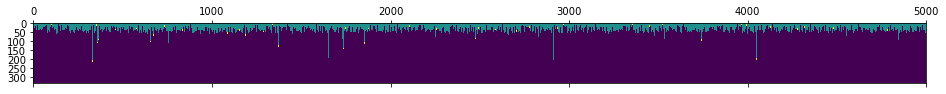

In [18]:
plt.matshow(np.transpose(sepsis_matrix))

## Matrix display 1000 by 1000

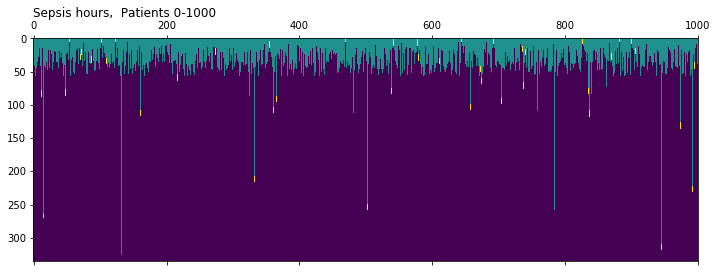

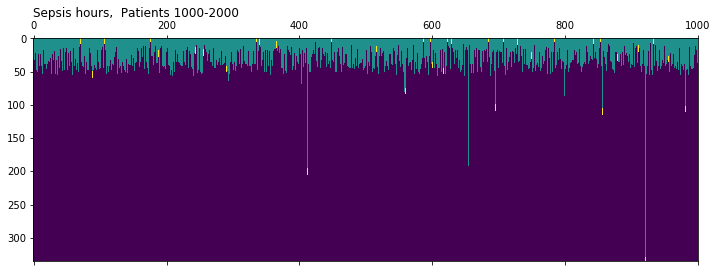

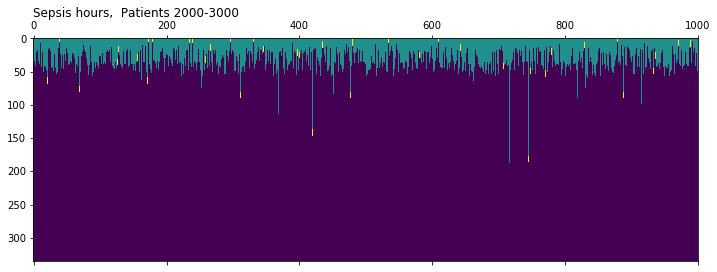

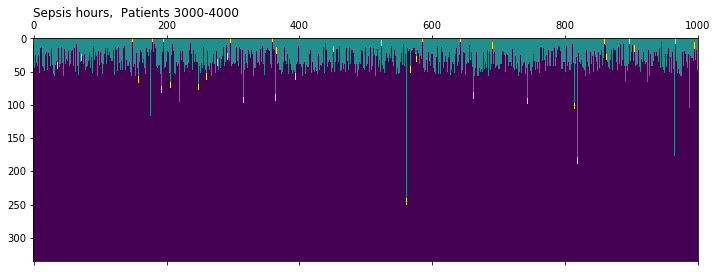

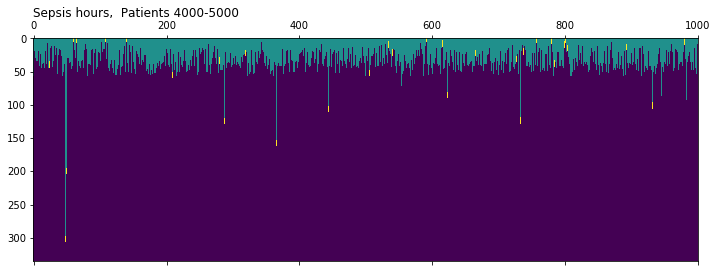

In [19]:
step = 1000
for i in range(int(len(SL)/step)):
    plt.matshow(np.transpose(sepsis_matrix[i*step:(i+1)*step]))
    plt.title("Sepsis hours,  Patients " + str(i*step) + "-" + str(i*step+step)+"\n",loc='left')

## Sepsis patients only

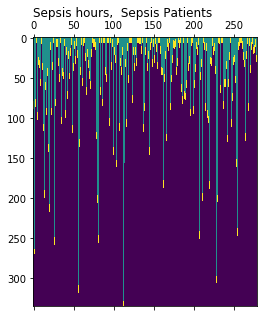

In [20]:
plt.matshow(np.transpose(sepsis_matrix[sepsis_idx]))
plt.title("Sepsis hours,  Sepsis Patients \n",loc='left')

## Matrix Sepsis (from last hours perspective, reversed)

In [21]:
# Initialize sepsis matrix
sepsis_matrix_last = -1 * np.ones((len(SL),mv), dtype=int)
for i in range(len(SL)):
    sepsis_matrix_last[i][-(SL[i].count(axis = 0)[0]):] = (SL[i].values).flatten()
np.shape(sepsis_matrix_last)

(5000, 336)

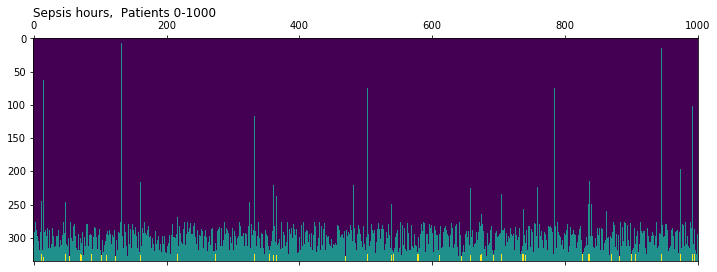

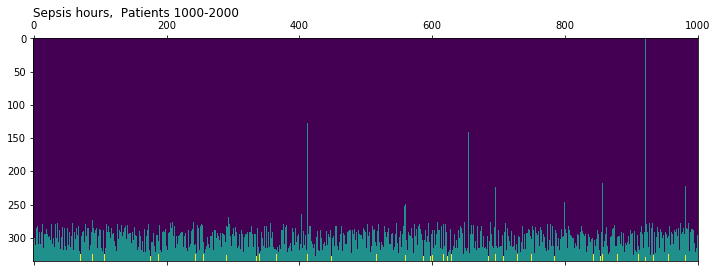

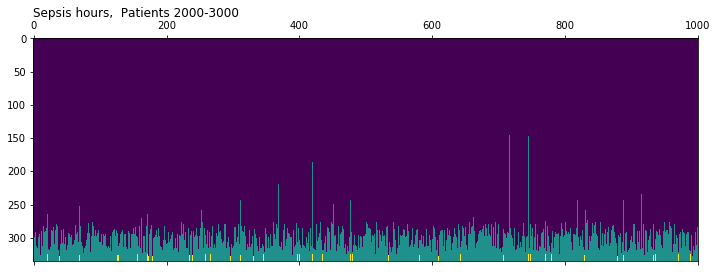

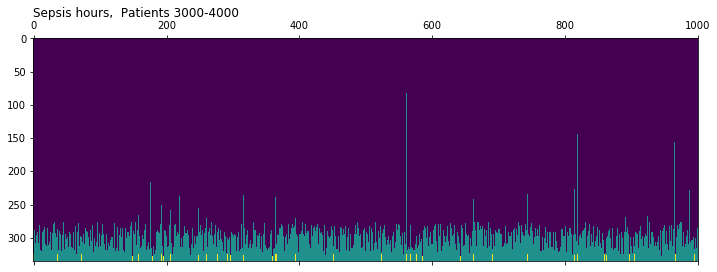

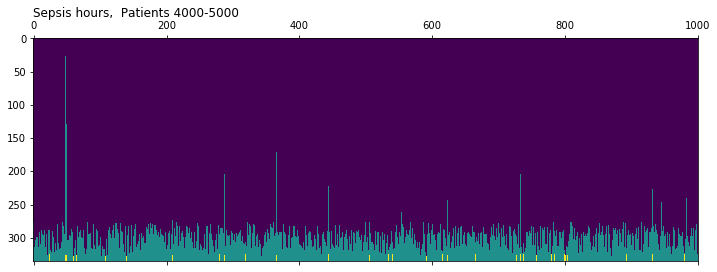

In [22]:
step = 1000
for i in range(int(len(SL)/step)):
    plt.matshow(np.transpose(sepsis_matrix_last[i*step:(i+1)*step]))
    plt.title("Sepsis hours,  Patients " + str(i*step) + "-" + str(i*step+step)+"\n",loc='left')

## Focus on sepsis patients, last nhours

In [23]:
sepsis_matrix_pos = sepsis_matrix_last[sepsis_idx]

In [24]:
nhours = 50

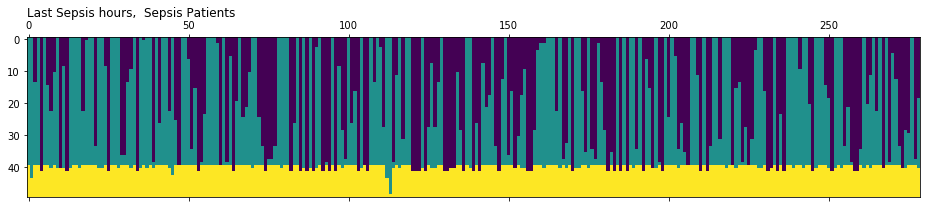

In [25]:
plt.matshow(np.transpose(sepsis_matrix_pos[:,-nhours:]))
plt.title("Last Sepsis hours,  Sepsis Patients \n",loc='left')